In [125]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as ply
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import warnings
from sklearn.metrics import mean_squared_error
warnings.filterwarnings('ignore')

In [126]:
df=pd.read_csv("insurance.csv")

In [127]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


###### from the dataset it is seen that there are 3 categorical features
###### - sex
###### - smoker
###### - region

In [128]:
df.shape

(1338, 7)

In [129]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [130]:
# hecking for the missing data
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [131]:
# description of dataset
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


# Distribution of each column

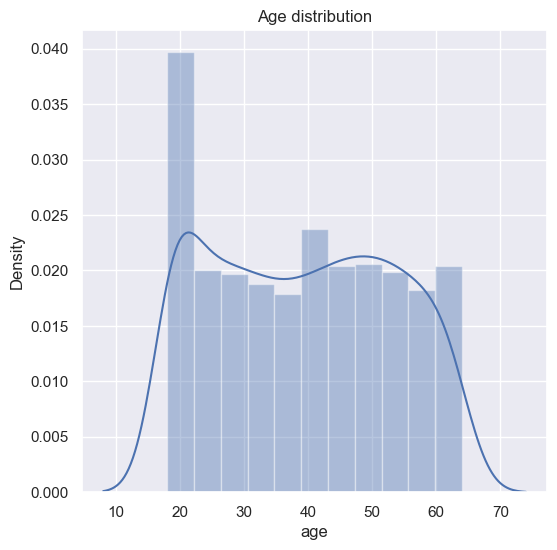

In [132]:
# distributio of 'age' column
sns.set()
ply.figure(figsize=(6,6))
sns.distplot(df['age'])
ply.title('Age distribution')
ply.show()

Text(0.5, 1.0, 'Sex distribution')

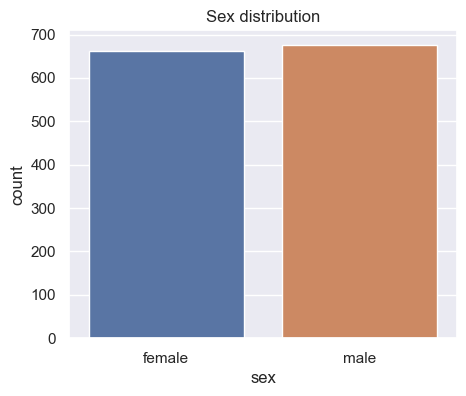

In [133]:
# distribution of sex
ply.figure(figsize=(5,4))
sns.countplot(x='sex',data=df)
ply.title("Sex distribution")

In [134]:
df['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

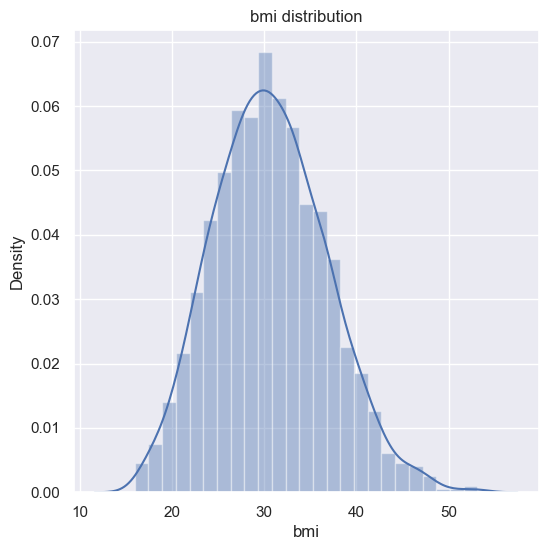

In [135]:
# distribution for 'bmi'
ply.figure(figsize=(6,6))
sns.distplot(df['bmi'])
ply.title('bmi distribution')
ply.show()

Text(0.5, 1.0, 'Children distribution')

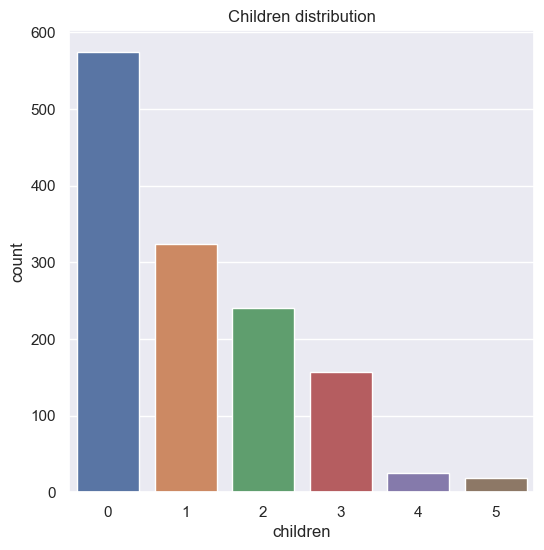

In [136]:
# distributin of children
ply.figure(figsize=(6,6))
sns.countplot(x='children',data=df)
ply.title("Children distribution")

Text(0.5, 1.0, 'smoker distribution')

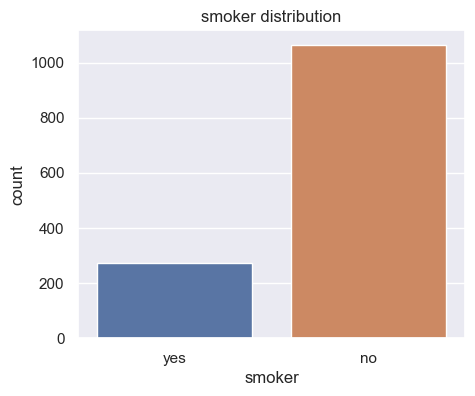

In [137]:
# distribution of "Smokers"
ply.figure(figsize=(5,4))
sns.countplot(x='smoker',data=df)
ply.title("smoker distribution")

In [138]:
df['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

Text(0.5, 1.0, 'region distribution')

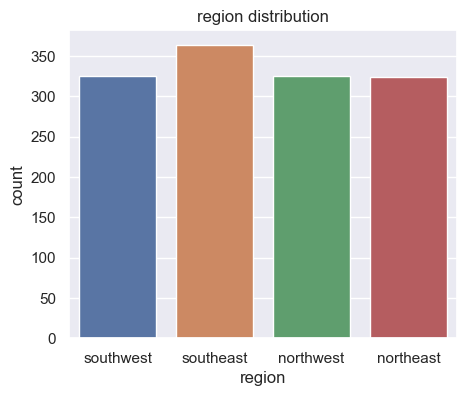

In [139]:
# distribution of region
ply.figure(figsize=(5,4))
sns.countplot(x='region',data=df)
ply.title("region distribution")

Text(0.5, 1.0, 'charges distribution')

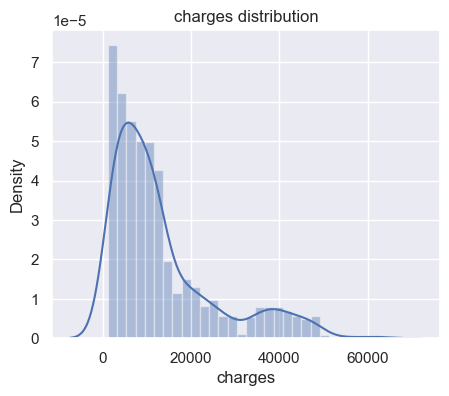

In [140]:
# distribution of charges
ply.figure(figsize=(5,4))
sns.distplot(df['charges'])
ply.title("charges distribution")

### Encoding

In [141]:
df.replace({'sex':{'male':0,'female':1}},inplace=True)
df.replace({'smoker':{'yes':0,'no':1}},inplace=True)
df.replace({'region':{'southeast':0,'southwest':1,'northeast':2,'northwest':3}},inplace=True)

In [142]:
# All the colunms that contain string values are converted into integer format.
df.head()


,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,0,1,16884.92400
1,18,0,33.770,1,1,0,1725.55230
2,28,0,33.000,3,1,0,4449.46200
3,33,0,22.705,0,1,3,21984.47061
4,32,0,28.880,0,1,3,3866.85520


### Splitting of independent and dependent features 

In [143]:
X=df.drop(columns='charges',axis=1)
Y=df['charges']

### Splitting of data into training and test data 

In [144]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2)
print("shape of X",X.shape)
print("shape of X_train",X_train.shape)
print("shape of X_test",X_test.shape)

shape of X (1338, 6)
shape of X_train (1070, 6)
shape of X_test (268, 6)


### model training
 ### 1) Linear Regression

In [145]:
model=LinearRegression()
model.fit(X_train,Y_train)

LinearRegression()

In [146]:
# r2_score for training data
train_pred=model.predict(X_train)
train_score=r2_score(Y_train,train_pred)
print("r2 score for training data: ",train_score)

r2 score for training data:  0.751505643411174


In [147]:
# r2_score for test data
test_pred=model.predict(X_test)
test_score=r2_score(Y_test,test_pred)
print("r2 score for testing data: ",test_score)

r2 score for testing data:  0.7447273869684077


In [148]:
# The value of r2_score for training and test data is nearly same to the model is generalized.

### Prediction system 

In [149]:
# "60,female,36.005,0,no,northeast,13228.84695 "
# For this row charges are 13228.84695
#this is the random row we selected , and we will impliment this model on this and try to find the charges.
input=(60,1,36.005,0,1,2)
input=np.asarray(input)
inputre=input.reshape(1,-1)
prediction=model.predict(inputre)
print("prediction from model : ",prediction[0])

prediction from model :  14869.358972029235


In [150]:
# "31,female,25.74,0,no,southeast,3756.6216"
# For this row charges are 3756.6216
#this is the random row we selected , and we will impliment this model on this and try to find the charges.
input=(31,1,25.74,0,1,0)
input=np.asarray(input)
inputre=input.reshape(1,-1)
prediction=model.predict(inputre)
print("prediction from model : ",prediction[0])

prediction from model :  3760.080576496046


## Decision Tree

In [151]:
from sklearn.tree import DecisionTreeRegressor

In [152]:
reg=DecisionTreeRegressor()
reg.fit(X_train,Y_train)
y_pred=reg.predict(X_test)

In [153]:
y_pred

array([ 2396.0959  , 10214.636   , 25656.57526 ,  1720.3537  ,
        8302.53565 ,  5400.9805  ,  2789.0574  ,  2198.18985 ,
       28923.13692 ,  7201.70085 , 12224.35085 ,  3500.6123  ,
       18608.262   ,  1131.5066  , 10043.249   , 14001.2867  ,
        2137.6536  ,  6128.79745 , 21659.9301  ,  7323.734819,
       11842.62375 ,  2331.519   , 39047.285   , 20773.62775 ,
       37165.1638  , 11534.87265 ,  3213.62205 ,  9704.66805 ,
        3987.926   ,  3176.2877  ,  6474.013   ,  3594.17085 ,
       17626.23951 ,  4243.59005 ,  7726.854   , 14133.03775 ,
       39611.7577  ,  5028.1466  , 18310.742   , 13937.6665  ,
        2128.43105 , 36021.0112  ,  7518.02535 ,  1875.344   ,
        6770.1925  ,  4889.9995  ,  9620.3307  ,  3875.7341  ,
        4686.3887  , 10713.644   , 26018.95052 ,  1242.26    ,
       17352.6803  , 43254.41795 ,  6500.2359  , 11411.685   ,
        1972.95    ,  7162.0122  ,  2150.469   , 42124.5153  ,
       30166.61817 ,  1980.07    ,  2855.43755 , 41949.

In [154]:

# r2_score for test data
test_pred=reg.predict(X_test)
test_score=r2_score(Y_test,y_pred)
print("r2 score for testing data by Decision Tree: ",test_score)


r2 score for testing data by Decision Tree:  0.6810705741624508


# Random Forest

In [155]:
from sklearn.ensemble import RandomForestRegressor

In [156]:
rfr= RandomForestRegressor(n_estimators=10)
rfr.fit(X_train,Y_train)

RandomForestRegressor(n_estimators=10)

In [157]:
rf_pred=rfr.predict(X_test)

In [158]:
# r2_score for test data
test_pred=rfr.predict(X_test)
test_score=r2_score(Y_test,rf_pred)
print("r2 score for testing data by Random Forest: ",test_score)

r2 score for testing data by Random Forest:  0.8257015122032735


## AdaBoost Model

In [159]:
from sklearn.ensemble import AdaBoostRegressor

In [160]:
adr=AdaBoostRegressor()
adr.fit(X_train,Y_train)

AdaBoostRegressor()

In [161]:
adr_pred=adr.predict(X_test)

In [162]:
# r2_score for test data
test_pred=adr.predict(X_test)
test_score=r2_score(Y_test,adr_pred)
print("r2 score for testing data by Adaboost: ",test_score)

r2 score for testing data by Adaboost:  0.8276099028554349


## Gradient Boosting

In [188]:
from sklearn.ensemble import GradientBoostingRegressor

In [189]:
gbr=GradientBoostingRegressor()
gbr.fit(X_train,Y_train)
gbr_pred=gbr.predict(X_test)

In [190]:
# r2_score for test data
test_pred=gbr.predict(X_test)
test_score=r2_score(Y_test,gbr_pred)
print("r2 score for testing data by Gradient boosting: ",test_score)


r2 score for testing data by Gradient boosting:  0.8683712229758765
